# 1. $\epsilon$ greddy algorithm

fisrt we create all the arm bandits

In [15]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

k = 10
mu = np.random.uniform(1.,2.,k)
sma= np.random.uniform(1,3,k)
print(mu)
def bandit(k,mu = mu,sma= sma):
    sigma = sma[k]
    m = mu[k]
    return sigma * np.random.randn() + m

[1.5488135  1.71518937 1.60276338 1.54488318 1.4236548  1.64589411
 1.43758721 1.891773   1.96366276 1.38344152]


best bandit 0.1:  7
best bandit 0.3:  0
best bandit 0.6:  6


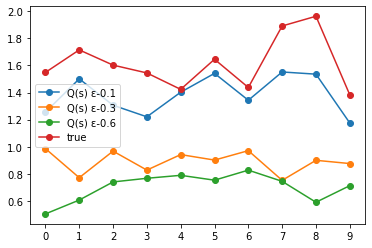

In [16]:
T = 1000
U = list(range(k))
eps = [0.1, 0.3, 0.6]
q = np.zeros((k,100,len(eps)))

for j in range(100):   ### numbers of test
    ns = np.zeros(k)
    for p,e in enumerate(eps):
        for t in range(T):
            if np.random.uniform() < e:
                i = np.random.choice(U)
            else:
                i = np.argmax(q[:,j,p])

            R = bandit(i)
            ns[i] += 1
            q[i,j,p] += 1/ns[i] * (R-q[i,j,p]) 

print('best bandit 0.1: ',np.argmax(np.mean(q[:,:,0],axis=1)))
print('best bandit 0.3: ',np.argmax(np.mean(q[:,:,1],axis=1)))
print('best bandit 0.6: ',np.argmax(np.mean(q[:,:,2],axis=1)))
plt.plot(np.arange(10),np.mean(q[:,:,0],axis=1),'o-',label='Q(s) \u03B5-0.1')
plt.plot(np.arange(10),np.mean(q[:,:,1],axis=1),'o-',label='Q(s) \u03B5-0.3')
plt.plot(np.arange(10),np.mean(q[:,:,2],axis=1),'o-',label='Q(s) \u03B5-0.6')
plt.plot(np.arange(10),mu,'o-',label='true')
plt.xticks(np.arange(10))
plt.legend()
plt.show()
    

We can observe how a greedy policy with lower epsilon gives a better estimate and gets to find the optimal action, whereas the other $\epsilon$, when too high, can start giving wrong estimates of the optimal action and would not get good results.

# Non-stationary case

In [160]:
kt = 5
a = np.random.uniform(0.5,2,kt)
b = np.random.uniform(0,0.005,kt)
c = np.random.uniform(0,2*np.pi,kt)
d = 0 #np.random.uniform(-2.,2.,k)

muv = lambda t: a*np.cos(b*t + c) + d
smav = np.random.uniform(0,0.5,kt)

def nonstaticBandit(i,t, muv=muv,smav=smav):
    return bandit(i,mu=muv(t),sma=smav)

runs = np.zeros((T,kt))
for t in range(T):
    runs[t,:] = muv(t)

In [161]:
alpha = [0.1, 0.5, 0.7]
l=0
qv = np.zeros((kt,len(alpha)))
Q = np.zeros((kt,T,len(alpha)))

for p, a in enumerate(alpha):
    for t in range(T):
        if np.random.uniform() <= eps[l]:
            i = np.random.choice(U[:kt])
        else:
            i = np.argmax(qv[:,p])
        
        R = nonstaticBandit(i,t)
        qv[i,p] = qv[i,p] + a*(R-qv[i,p])
        Q[:,t,p] = np.copy(qv[:,p])

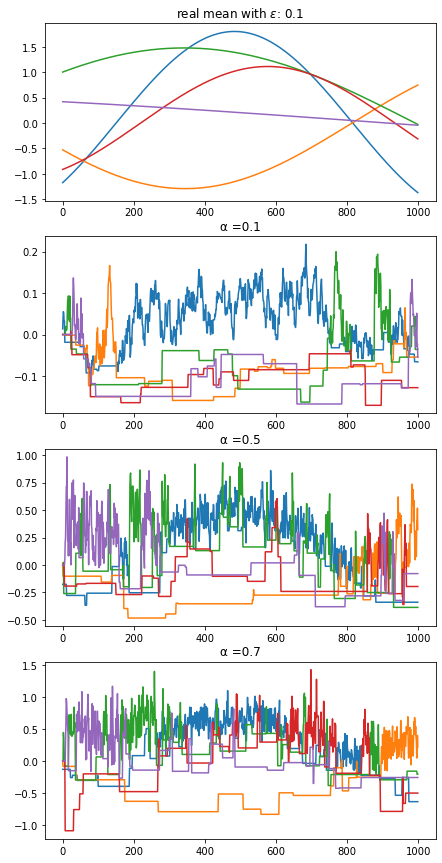

In [164]:
f, ax = plt.subplots(4,1, figsize=(7,15))

ax[0].plot(runs)
ax[0].set_title('real mean with $\epsilon$: '+str(eps[l]))
for p,al in enumerate(alpha):
    for a in U[:kt]:
        ax[p+1].plot(Q[a,:,p])
        ax[p+1].set_title('\u03B1 ='+str(al))

# 2. Upper bound confidence

$$ A_t = \underset{a}{argmax} \left( Q_t(a) + c \sqrt{\frac{ln t}{N_t(a)}} \right)$$

Where C is the exploration parameter.

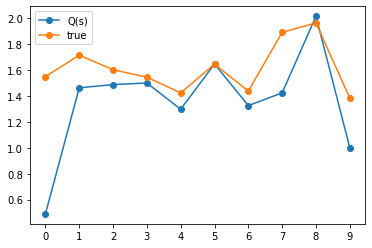

In [199]:
ns = np.ones(k)
q = np.zeros(k)
c = 2
for t in range(T):
    if np.random.uniform() < 0.1:
        i = np.random.choice(U)
    else:
        temp = q + c*np.sqrt(np.log(t+1)/(ns+ 1e-6)) 
        i = np.argmax(temp)

    R = bandit(i)
    ns[i] += 1
    q[i] += 1/ns[i] * (R-q[i])
    
plt.plot(np.arange(10),q,'o-',label='Q(s)')
plt.plot(np.arange(10),mu,'o-',label='true')
plt.xticks(np.arange(10))
plt.legend()
plt.show()

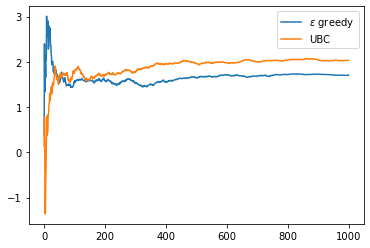

In [262]:
ns = np.zeros(k)
q = np.zeros(k)
ns_ubc = np.zeros(k)
q_ubc = np.zeros(k)
c = 2
r = np.zeros(T)
r_ubc = np.zeros(T)
R = 0
R_ubc = 0

for t in range(T):
    if np.random.uniform() < 0.1:
        j = np.random.choice(U)
        #i = np.random.choice(U)
    else:
        j = np.argmax(q)
    temp = q_ubc + c*np.sqrt(np.log(t+1)/(ns_ubc+ 1e-6)) 
    i = np.argmax(temp)

    R += bandit(j)
    R_ubc += bandit(i)
    r[t] = R/(t+1)
    r_ubc[t] = R_ubc/(t+1)
    
    ns[j] += 1
    q[j] += 1/ns[j] * (R-q[j])
    ns_ubc[i] += 1
    q_ubc[i] += 1/ns_ubc[i] * (R_ubc-q_ubc[i])
    
plt.plot(r,'-',label='$\epsilon$ greedy')
plt.plot(r_ubc,'-',label='UBC')
plt.legend()
plt.show()